In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Macroinvertebrados.xlsx', sheet_name='Prepared_macros')
df.drop(df[df['dive_date'].isnull()].index, inplace = True)


In [14]:
df.head()

,id,dive_date,dive_month,year,Transect.code,Island,Bioregion,MPA_Status,Sum_ind,Countsize_ind,...,ScientificName,CommonNameEnglish,CommonNameSpanish,Site,Latitude,Longitude,Subzone.name,Refuge_Level,depth_strata,epoca
0,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,1,1,...,Diadema mexicanum,Hatpin urchin,erizo aguja,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
1,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,203,95,...,Eucidaris galapagensis,Slate pencil urchin,erizo lapicero,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
2,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,4,4,...,Holothuria (Halodeima) kefersteini,Sea cucumber,pepino de mar,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
3,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,45,45,...,Lytechinus semituberculatus,Green sea urchin,erizo verde,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
4,7,2010-02-04,February,2010,ES01M040210B,Española,Sureste,Extractive use,5,5,...,Diadema mexicanum,Hatpin urchin,erizo aguja,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,15m,Caliente


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 7024
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 6933 non-null   int64         
 1   dive_date          6933 non-null   datetime64[ns]
 2   dive_month         6933 non-null   object        
 3   year               6933 non-null   int64         
 4   Transect.code      6933 non-null   object        
 5   Island             6827 non-null   object        
 6   Bioregion          6888 non-null   object        
 7   MPA_Status         6933 non-null   object        
 8   Sum_ind            6933 non-null   int64         
 9   Countsize_ind      6933 non-null   int64         
 10  TaxonID            6691 non-null   float64       
 11  Domain             6691 non-null   object        
 12  Kingdom            6691 non-null   object        
 13  PhylumOrDivision   6691 non-null   object        
 14  Class   

In [18]:
df.describe()

,id,year,Sum_ind,Countsize_ind,TaxonID,Latitude,Longitude
count,6933.000000,6933.000000,6933.000000,6933.000000,6691.000000,6888.000000,6888.000000
mean,11.090004,2014.464734,60.396221,4.475552,8381.865342,-0.231837,-90.985973
std,2.931214,3.366501,156.893039,15.769021,1965.223098,0.786360,0.690677
min,7.000000,2010.000000,0.000000,0.000000,7591.000000,-1.378440,-92.007517
25%,9.000000,2012.000000,1.000000,0.000000,7977.000000,-0.702660,-91.437000
50%,11.000000,2014.000000,3.000000,1.000000,7983.000000,-0.273900,-91.337960
75%,13.000000,2017.000000,22.000000,3.000000,7998.000000,-0.040370,-90.468170
max,16.000000,2020.000000,2125.000000,423.000000,19516.000000,1.680950,-89.517900


In [19]:
df['dive_date'] = pd.to_datetime(df['dive_date'])
df['dive_date'].head()

0   2010-02-04
1   2010-02-04
2   2010-02-04
3   2010-02-04
4   2010-02-04
Name: dive_date, dtype: datetime64[ns]

<Figure size 1080x720 with 0 Axes>

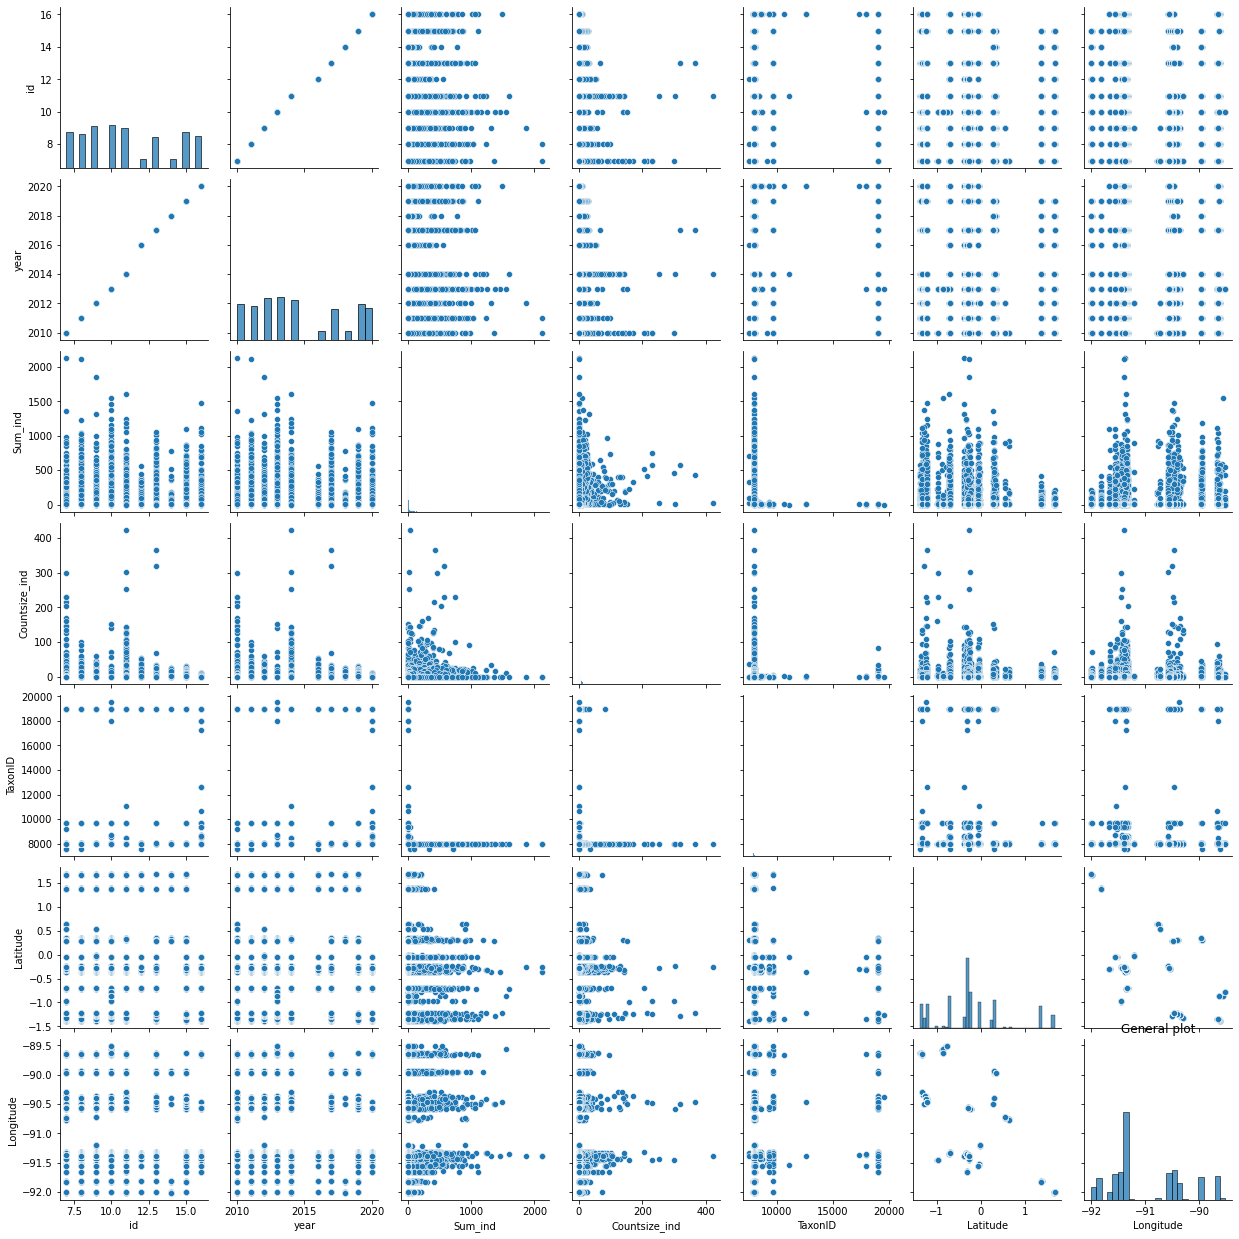

In [53]:
# General plot
plt.figure(figsize=(15,10))
sns.pairplot(df, diag_kind='hist', palette='viridis')
plt.title('General plot')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


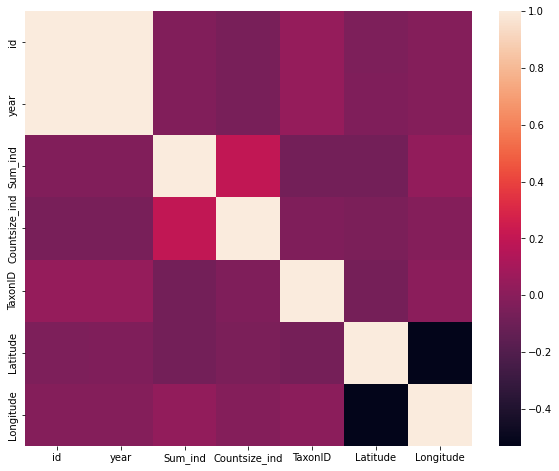

In [23]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [51]:
import plotly.express as px
df_mod_epoca_calida = df[df['epoca'] == 'Caliente']
fig = px.scatter_mapbox(df_mod_epoca_calida, 
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Transect.code",
                        hover_data=["CommonNameSpanish", "Transect.code", "Latitude", "Longitude"],
                        color="CommonNameSpanish",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Make the plot BIGGER
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    )
fig.show()

In [52]:
import plotly.express as px
df_mod_epoca_calida = df[df['epoca'] != 'Caliente']
fig = px.scatter_mapbox(df_mod_epoca_calida, 
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Transect.code",
                        hover_data=["CommonNameSpanish", "Transect.code", "Latitude", "Longitude"],
                        color="CommonNameSpanish",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Make the plot BIGGER
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    )
fig.show()